In [1]:
%pylab inline

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO: 2016-06-21 14:49:15,779 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ri = hardware_tools.r2_with_mk1()

INFO: 2016-06-21 14:49:18,466 - kid_readout.roach.interface.initialize:411  Loaded ROACH state from /data/readout/r2kid_config.npz


In [4]:
ri.iq_delay = -1

In [6]:
ri.demodulator.hardware_delay_samples=16025.6

In [7]:
ri.set_lo(1010.0)

In [8]:
ri.set_dac_atten(40.0)

In [7]:
initial_f0 = np.load('/data/readout/resonances/2016-06-18-jpl-hex-271-initial-lo-1210-resonances.npy')

In [11]:
nsamp = 2**17
step = 1
nstep = 48
#f0binned = np.round(f0s * nsamp / 512.0) * 512.0 / nsamp
offset_bins = np.arange(-(nstep), (nstep)) * step

offsets = offset_bins * 512.0 / nsamp

In [12]:
offsets

array([-0.1875    , -0.18359375, -0.1796875 , -0.17578125, -0.171875  ,
       -0.16796875, -0.1640625 , -0.16015625, -0.15625   , -0.15234375,
       -0.1484375 , -0.14453125, -0.140625  , -0.13671875, -0.1328125 ,
       -0.12890625, -0.125     , -0.12109375, -0.1171875 , -0.11328125,
       -0.109375  , -0.10546875, -0.1015625 , -0.09765625, -0.09375   ,
       -0.08984375, -0.0859375 , -0.08203125, -0.078125  , -0.07421875,
       -0.0703125 , -0.06640625, -0.0625    , -0.05859375, -0.0546875 ,
       -0.05078125, -0.046875  , -0.04296875, -0.0390625 , -0.03515625,
       -0.03125   , -0.02734375, -0.0234375 , -0.01953125, -0.015625  ,
       -0.01171875, -0.0078125 , -0.00390625,  0.        ,  0.00390625,
        0.0078125 ,  0.01171875,  0.015625  ,  0.01953125,  0.0234375 ,
        0.02734375,  0.03125   ,  0.03515625,  0.0390625 ,  0.04296875,
        0.046875  ,  0.05078125,  0.0546875 ,  0.05859375,  0.0625    ,
        0.06640625,  0.0703125 ,  0.07421875,  0.078125  ,  0.08

In [14]:
sa = acquire.run_sweep(ri,np.array([1067.1,1091.1,1096.37,1105.72])[None,:]+offsets[:,None],num_tone_samples=nsamp,
                       length_seconds=.1,verbose=True)

Measuring bank
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95


In [18]:
swp1 = sa.sweep(1)

In [26]:
Qe = swp1.resonator.Q_e_real + 1j*swp1.resonator.Q_e_imag

In [27]:
1/np.real(1/Qe)

633977.66435414215

In [28]:
1/(1/swp1.resonator.Q - np.real(1/Qe))

58702.753960167393

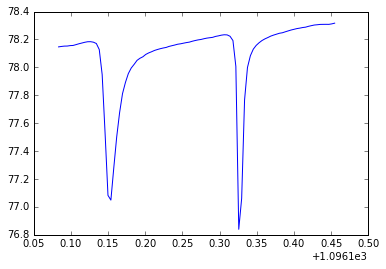

In [34]:
plot(sa.sweep(2).frequency_MHz,20*np.log10(np.abs(sa.sweep(2).s21_point)))

In [45]:
swp2 = sa.sweep(3)

In [46]:
res2 = lmfit_resonator.CollidingLinearResonatorsWithCable(swp2.frequency,swp2.s21_point,swp2.s21_point_error)

In [47]:
res2.fit()

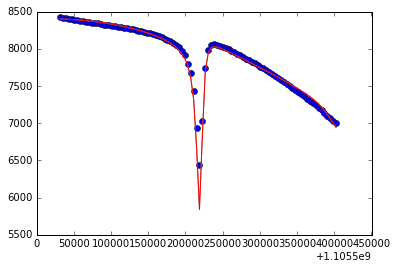

In [48]:
res2.plot()

In [49]:
res2.bg_Q

22547.684722736634

In [50]:
res2.fg_Q

120043.58640208052

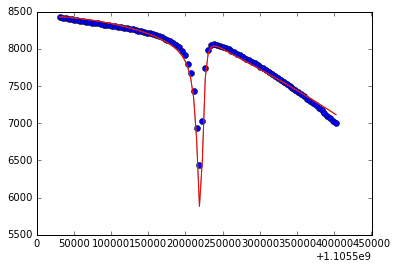

In [51]:
swp2.resonator.plot()

In [52]:
swp2.resonator.Q

120151.07064175738

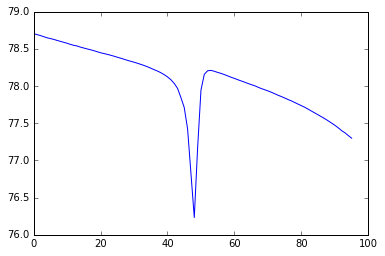

In [53]:
plot(20*np.log10(np.abs(swp2.s21_point)))

In [8]:
x,y = ri.get_raw_adc()

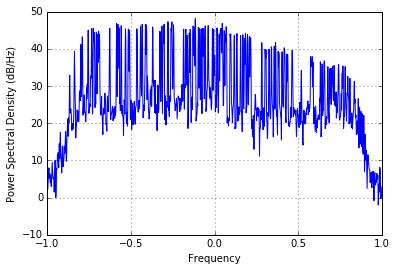

In [9]:
_=psd(x+1j*y,NFFT=1024)

In [61]:
swa = acquire.run_sweep(ri,tone_banks=initial_f0[None,:]/1e6+offsets[:,None],num_tone_samples=2**16,length_seconds=.1,verbose=True)

Measuring bank
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47


In [16]:
swa.num_channels

128

In [18]:
swp.fit_resonator()

In [20]:
swp.resonator.Q

186805.36982239652

In [23]:
swp.resonator.model.eval(params=swp.resonator.current_params,f=swp.frequency)

array([ -1.15259911e-01-0.02840333j,   1.03742966e-01-0.06166545j,
        -3.11274011e-02+0.11863701j,  -6.20561093e-02-0.10805347j,
         1.21906164e-01+0.03394559j,  -1.12349195e-01+0.06230248j,
         3.68526325e-02-0.12505801j,   6.24015179e-02+0.11661906j,
        -1.28081843e-01-0.03984237j,   1.20850204e-01-0.06234978j,
        -4.29075866e-02+0.13096524j,  -6.21433242e-02-0.12502756j,
         1.33693572e-01+0.04603968j,  -1.29133187e-01+0.06177752j,
         4.92282896e-02-0.13624934j,   6.12468117e-02+0.13314536j,
        -1.38611191e-01-0.05246078j,   1.37037356e-01-0.06054435j,
        -5.57214683e-02+0.14075261j,  -5.96614924e-02-0.14077569j,
         1.42639953e-01+0.05899056j,  -1.44317518e-01+0.05858706j,
         6.22426136e-02-0.14422956j,   5.73061318e-02+0.14760676j,
        -1.45463349e-01-0.06544414j,   1.50568159e-01-0.05579823j,
        -6.85500450e-02+0.14626182j,  -5.40342383e-02-0.15309777j,
         1.46512650e-01+0.07149777j,  -1.55047175e-01+0.051971

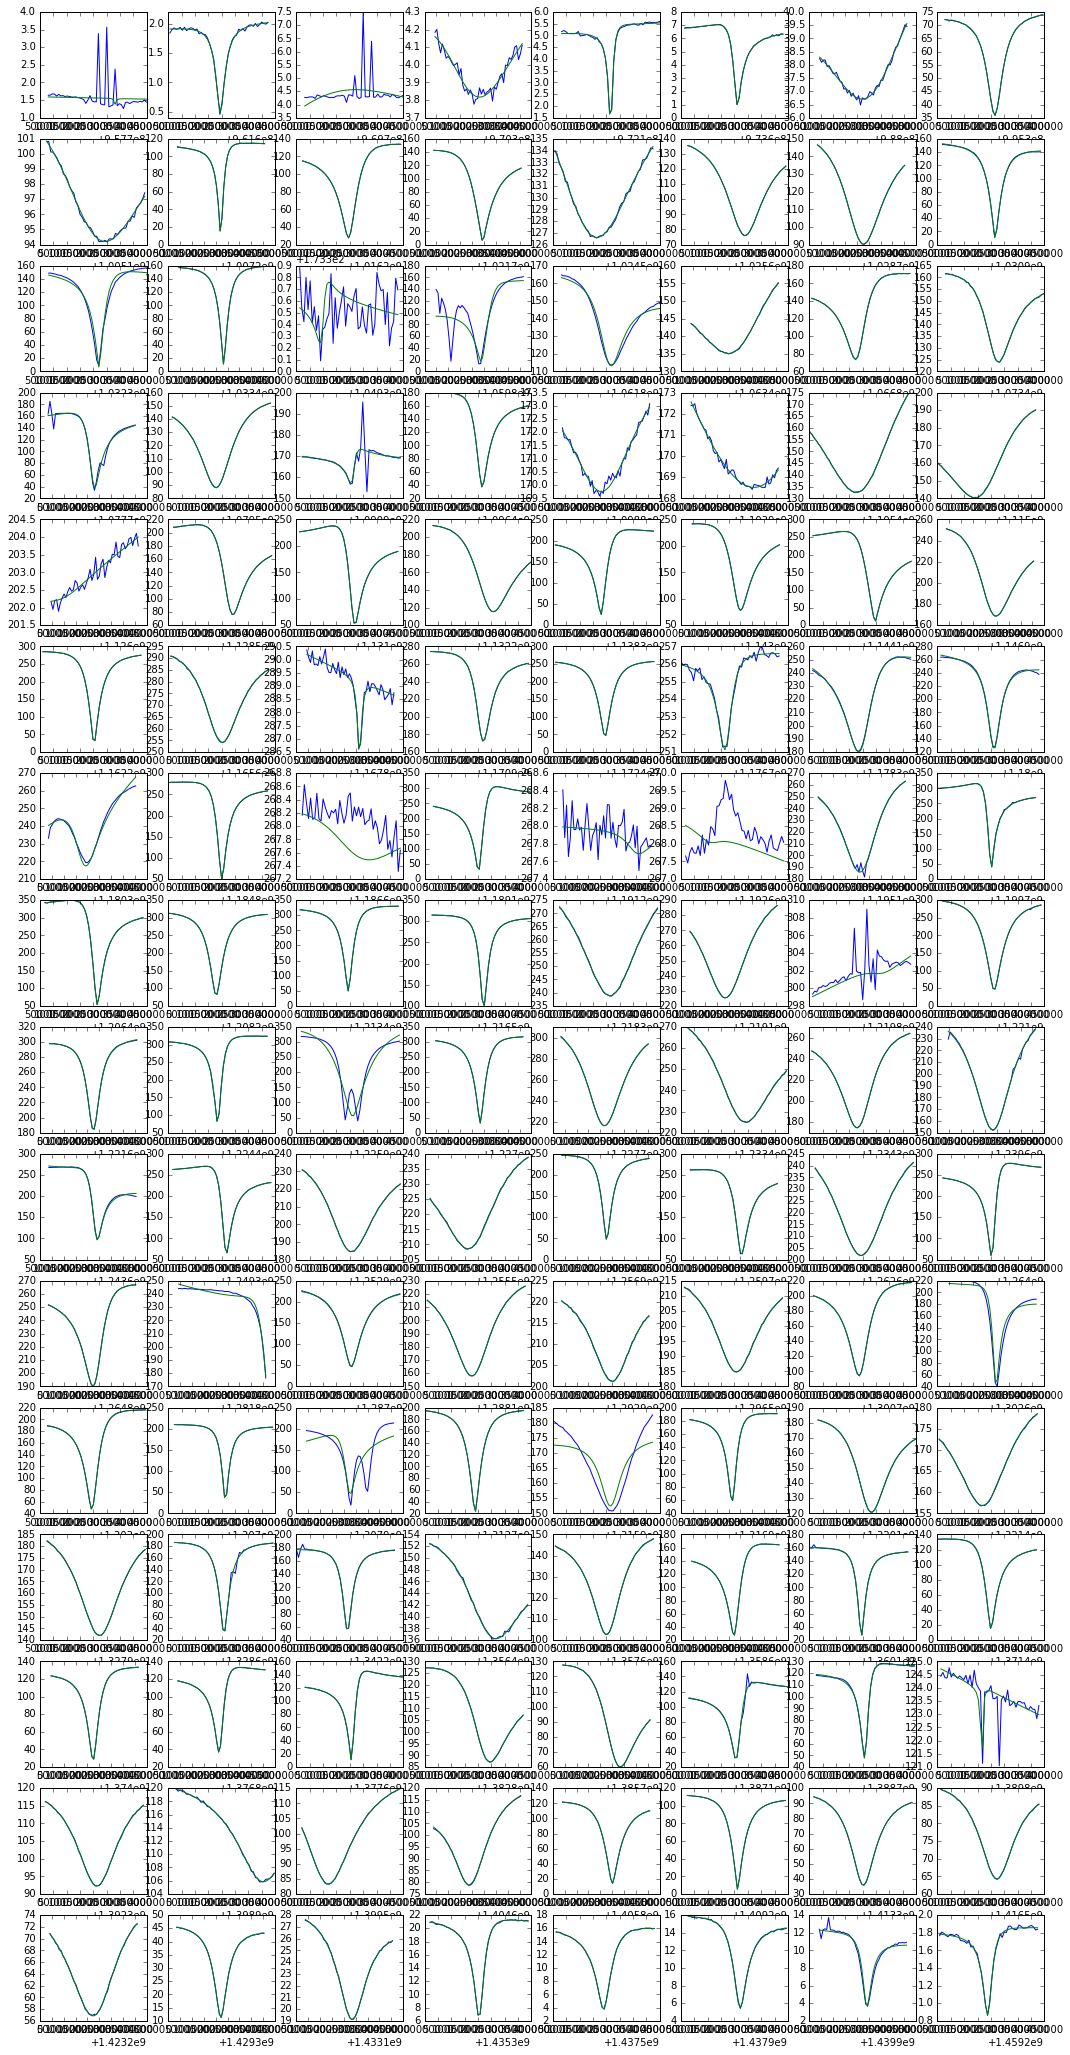

In [62]:
fig,axs = subplots(16,8,figsize=(18,36))
for k in range(swa.num_channels):
    ax = axs.flatten()[k]
    swp = swa.sweep(k)
    ax.plot(swp.frequency,np.abs(swp.s21_point))
    model = swp.resonator.model.eval(params=swp.resonator.current_params,f=swp.frequency)
    ax.plot(swp.frequency,np.abs(model))

In [66]:
fit_f0s = np.array([swa.sweep(k).resonator.current_params['f_0'] for k in range(128)])

In [68]:
np.min(np.diff(fit_f0s)/1e6)

0.21621444445586205

In [63]:
swp2 = swa.sweep(128-8)

In [64]:
swp2.resonator.current_params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr
A_mag         79.1        0      inf     None     True     None
A_slope   -5.267e-08     -inf      inf     None     True     None
Q             5317    387.7 1.822e+05     None     True     None
Q_e_imag      3644   -1e+07    1e+07     None     True     None
Q_e_real  1.88e+04        1    1e+07     None     True     None
delay     -3.591e-07     -inf      inf     None     True     None
f_0       1.423e+09 1.423e+09 1.424e+09     None     True     None
f_min     1.423e+09     -inf      inf     None    False     None
phi          2.602   -3.142    3.142     None     True     None


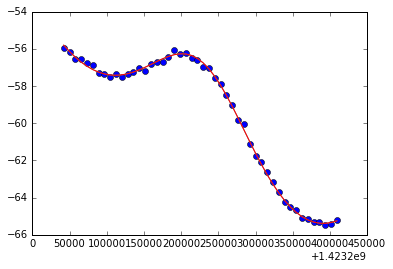

In [65]:
swp2.resonator.plot()

In [52]:
swp.resonator.current_params['delay'].max=0
swp.resonator.current_params['delay'].min=-100e-6

In [56]:
swp.resonator.fit(A_mag=4,f_0=1.4594e9,delay=-62.96e-5,Q=10000)

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/lmfit/model.py:495: UserWarning: The keyword argument delay_max does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)


In [54]:
swp.resonator.current_params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr
A_mag      -0.0379     -inf      inf     None     True     None
A_slope   1.296e-06     -inf      inf     None     True     None
Q         -2.022e+07     -inf      inf     None     True     None
Q_e_imag  9.689e+06   -1e+07    1e+07     None     True     None
Q_e_real  1.794e+06        1    1e+07     None     True     None
delay     -0.0006298     -inf      inf     None     True     None
f_0       1.475e+09     -inf      inf     None     True     None
f_min     1.459e+09     -inf      inf     None    False     None
phi         -1.133   -3.142    3.142     None     True     None


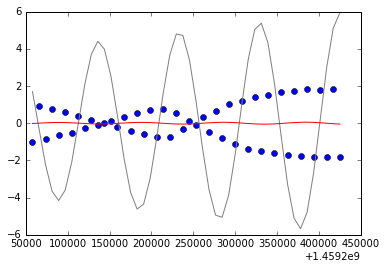

In [55]:
swp.resonator.plot()